In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

path = "tmp_data/"

In [ ]:
temporal = pd.read_csv(path + "temporal_epa.csv")
temporal_unp = pd.melt(temporal, id_vars = "month")

In [ ]:
sns.set_theme()
plt.rcParams.update({"figure.dpi": 300})
fig, ax = plt.subplots(figsize = (16,6))
plot = sns.lineplot(temporal_unp, x = "month", y = "value", hue = "variable")
pos, val = [], []
for label in ax.get_xticklabels():
    d_arr = label.get_text().split("-")
    if d_arr[1] == "01" or d_arr[1] == "07":
        pos.append(label.get_position()[0])
        val.append("-".join(d_arr[:2]))
    
plt.xticks(pos, val)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha = "right")
plt.xlabel("Month")
plt.ylabel("Num Records")
plt.legend(title = "Pollutant")
plt.title("Seasonal Data Availability for EPA Dataset")
plt.show()

In [ ]:
temporal = pd.read_csv(path + "temporal_noaa.csv")
sns.set_theme()
plt.rcParams.update({"figure.dpi": 300})
fig, ax = plt.subplots(figsize = (16,6))
plot = sns.lineplot(temporal, x = "month", y = "n")
pos, val = [], []
for label in ax.get_xticklabels():
    d_arr = label.get_text().split("-")
    if d_arr[1] == "01" or d_arr[1] == "07":
        pos.append(label.get_position()[0])
        val.append("-".join(d_arr[:2]))
    
plt.xticks(pos, val)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha = "right")
plt.xlabel("Month")
plt.ylabel("Num Records")
plt.title("Seasonal Data Availability for NOAA Dataset")
plt.show()

In [ ]:
import json
with open(path + "geojson-counties-fips.json") as response:
    counties = json.load(response)

In [7]:
from PIL import Image
import io
import plotly.graph_objects as go

def save_gif(fig, filename = "output.gif", title = None, show_timestamp = False, frame_ms = 1000):
    # Extract frames from the animation
    frames = []
    for i, frame in enumerate(fig.frames):
        # Update figure with frame data
        fig_static = go.Figure(data = frame.data, layout = fig.layout)
        text = ""
        if title is not None:
            text += title
        if show_timestamp:
            text += f" ({frame.name})"
        fig_static.update_layout(
            title = text,
        )
        fig_static["layout"].pop("sliders")
        fig_static["layout"].pop("updatemenus")
        
        # Convert to image
        img_bytes = fig_static.to_image(format="png", width=1280, height=720, scale = 1)
        img = Image.open(io.BytesIO(img_bytes))
        frames.append(img)

    # Save as GIF
    frames[0].save(
        filename,
        save_all=True,
        append_images=frames[1:],
        duration=frame_ms,  # milliseconds per frame
        loop=0  # 0 means infinite loop
    )

In [ ]:
county_epa = pd.read_csv(path + "county_epa.csv", dtype = {"fips" : str})
county_epa = county_epa.sort_values(by = "year", ascending=True)

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

plot_epa_coverage = px.choropleth(
    county_epa,
    geojson = counties,
    locations = "fips",
    color = "days",
    range_color=(0, 365),
    animation_frame="year",
    color_continuous_scale=colorscale,
    scope = "usa",
    labels = {'days' : "Num Days w/ Data"}
)  


In [ ]:
county_noaa = pd.read_csv(path + "county_noaa.csv", dtype = {"fips" : str})
county_noaa = county_noaa.sort_values(by = "year", ascending=True)

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

plot_noaa_coverage = px.choropleth(
    county_noaa,
    geojson = counties,
    locations = "fips",
    color = "days",
    range_color=(0, 365),
    animation_frame="year",
    color_continuous_scale=colorscale,
    scope = "usa",
    labels = {'days' : "Num Days w/ Data"}
)  

In [ ]:
color_scale = [
    '#c3e6cb',  # light green
    '#ffc107',  # yellow
    '#ff9800',  # orange
    '#e53935',  # red
    '#8b0000'   # very dark red
]

haz_county = pd.read_csv(path + "haz_county.csv", dtype = {"fips" : str})
# haz_county = haz_county[haz_county["state_name"] == "California"]
haz_county = haz_county.sort_values(by = "month", ascending=True)

haz_seasonal = px.choropleth(
    haz_county,
    geojson = counties,
    locations = "fips",
    color = "haz_days",
    range_color=(0, 30),
    animation_frame="month",
    color_continuous_scale=color_scale,
    scope = "usa",
    labels = {'haz_days' : "Num Hazardous Days"}
)  
# haz_seasonal.update_geos(fitbounds = "locations")

In [ ]:
rel_sdi = pd.read_csv(path + "rel_sdi.csv")

plt.rcParams.update({"figure.dpi": 300})
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_sdi, x = "sdi", y = "mean", alpha = 0.8, size = 1)
ax.legend().set_visible(False)
plt.xlabel("SDI Percentile")
plt.ylabel("Annual Average PM 2.5 Measurement")
plt.title("Relationship between Annual Mean PM2.5 and SDI")
plt.show()

In [ ]:
plt.rcParams.update({"figure.dpi": 300})
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_sdi, x = "sdi_score", y = "mean", alpha = 0.8, size = 1)
ax.legend().set_visible(False)
plt.xlabel("SDI Percentile")
plt.ylabel("Annual Average PM 2.5 Measurement")
plt.title("Relationship between Annual Mean PM2.5 and SDI")
plt.show()

In [ ]:
rel_air = pd.read_csv(path + "rel_air.csv")
rel_air = rel_air.sort_values(by = "month")
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_air, x = "log_traffic", y = "mean", hue = "month", alpha = 0.4, legend = False, s = 10)
ax.set_ylim(-5, 30)
plt.xlabel("Air Traffic (Log 10)")
plt.ylabel("Monthly Average PM 2.5 Measurement")
plt.title("Relationship between PM2.5 and Standardized Air Traffic\n(Zoomed in to ignore outliers)")
plt.show()

In [ ]:
rel_noaa1 = pd.read_csv("rel_noaa.csv")
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_noaa1, x = "slp", y = "level", alpha = 0.4, s = 10)
plt.xlabel("Sea Level Pressure (Daily Mean)")
plt.ylabel("PM 2.5 Level (Daily Mean)")
plt.show()

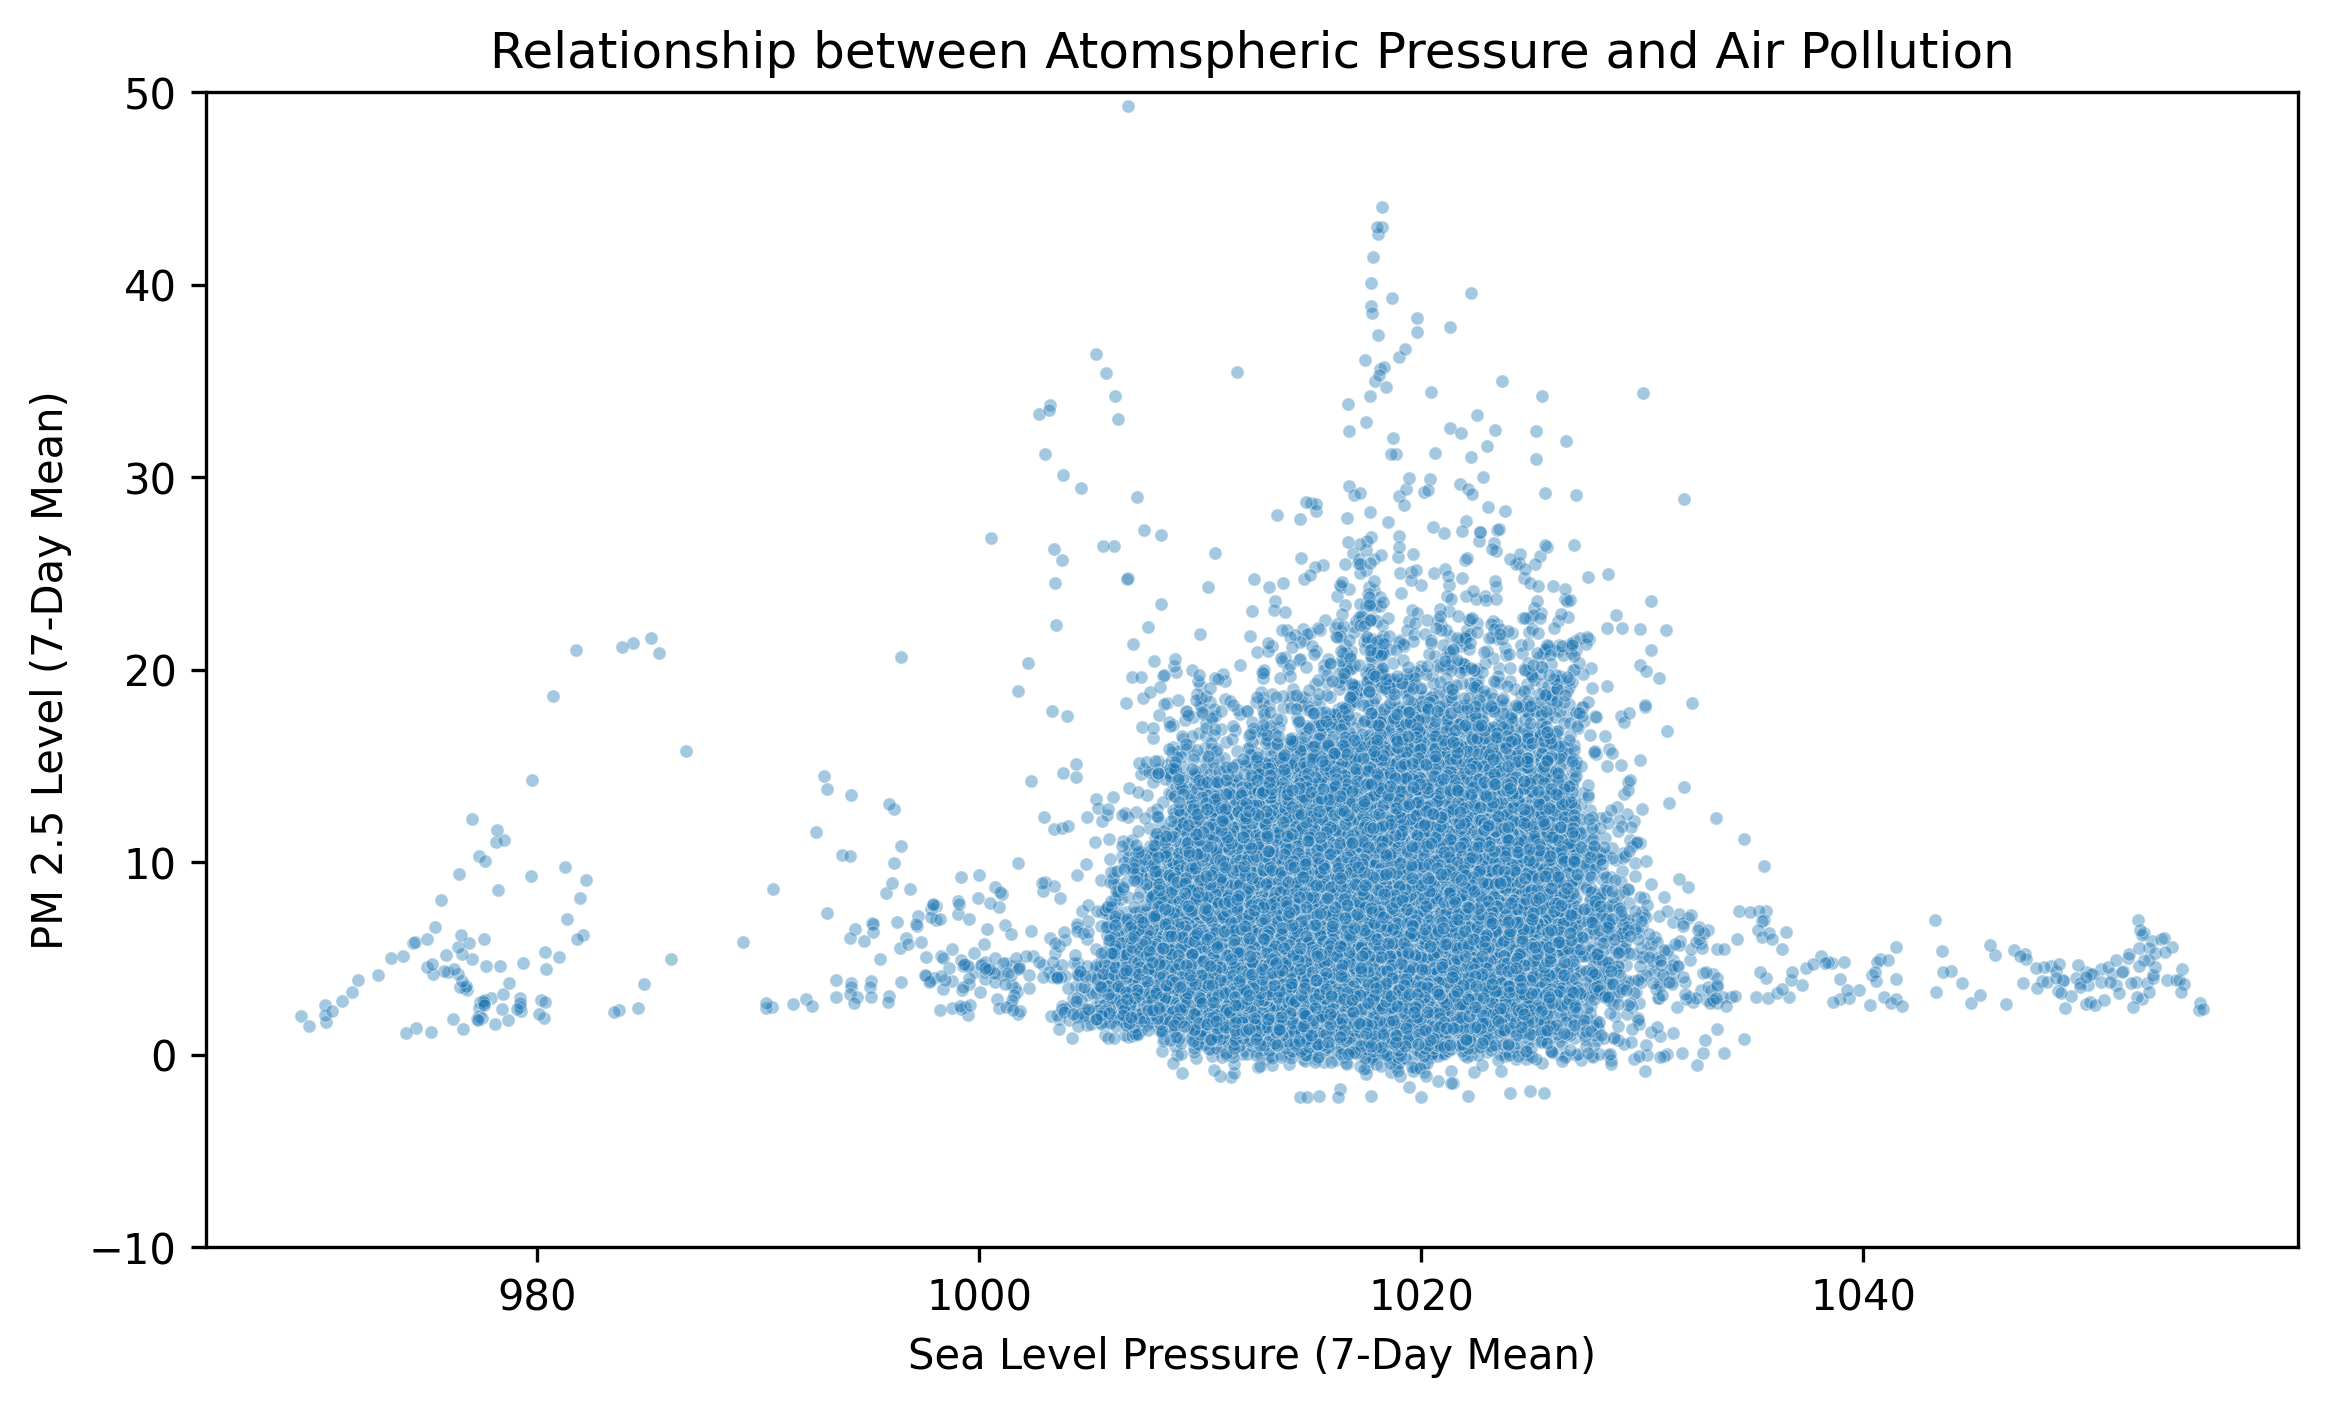

In [ ]:
plt.rcParams.update({"figure.dpi": 300})
rel_noaa = pd.read_csv(path + "rel_noaa_avg.csv")
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_noaa, x = "med_slp", y = "med_pm25", alpha = 0.4, s = 10)
plt.xlabel("Sea Level Pressure (7-Day Mean)")
plt.ylabel("PM 2.5 Level (7-Day Mean)")
plt.ylim(-10, 50)
plt.title("Relationship between Atomspheric Pressure and Air Pollution")
plt.show()

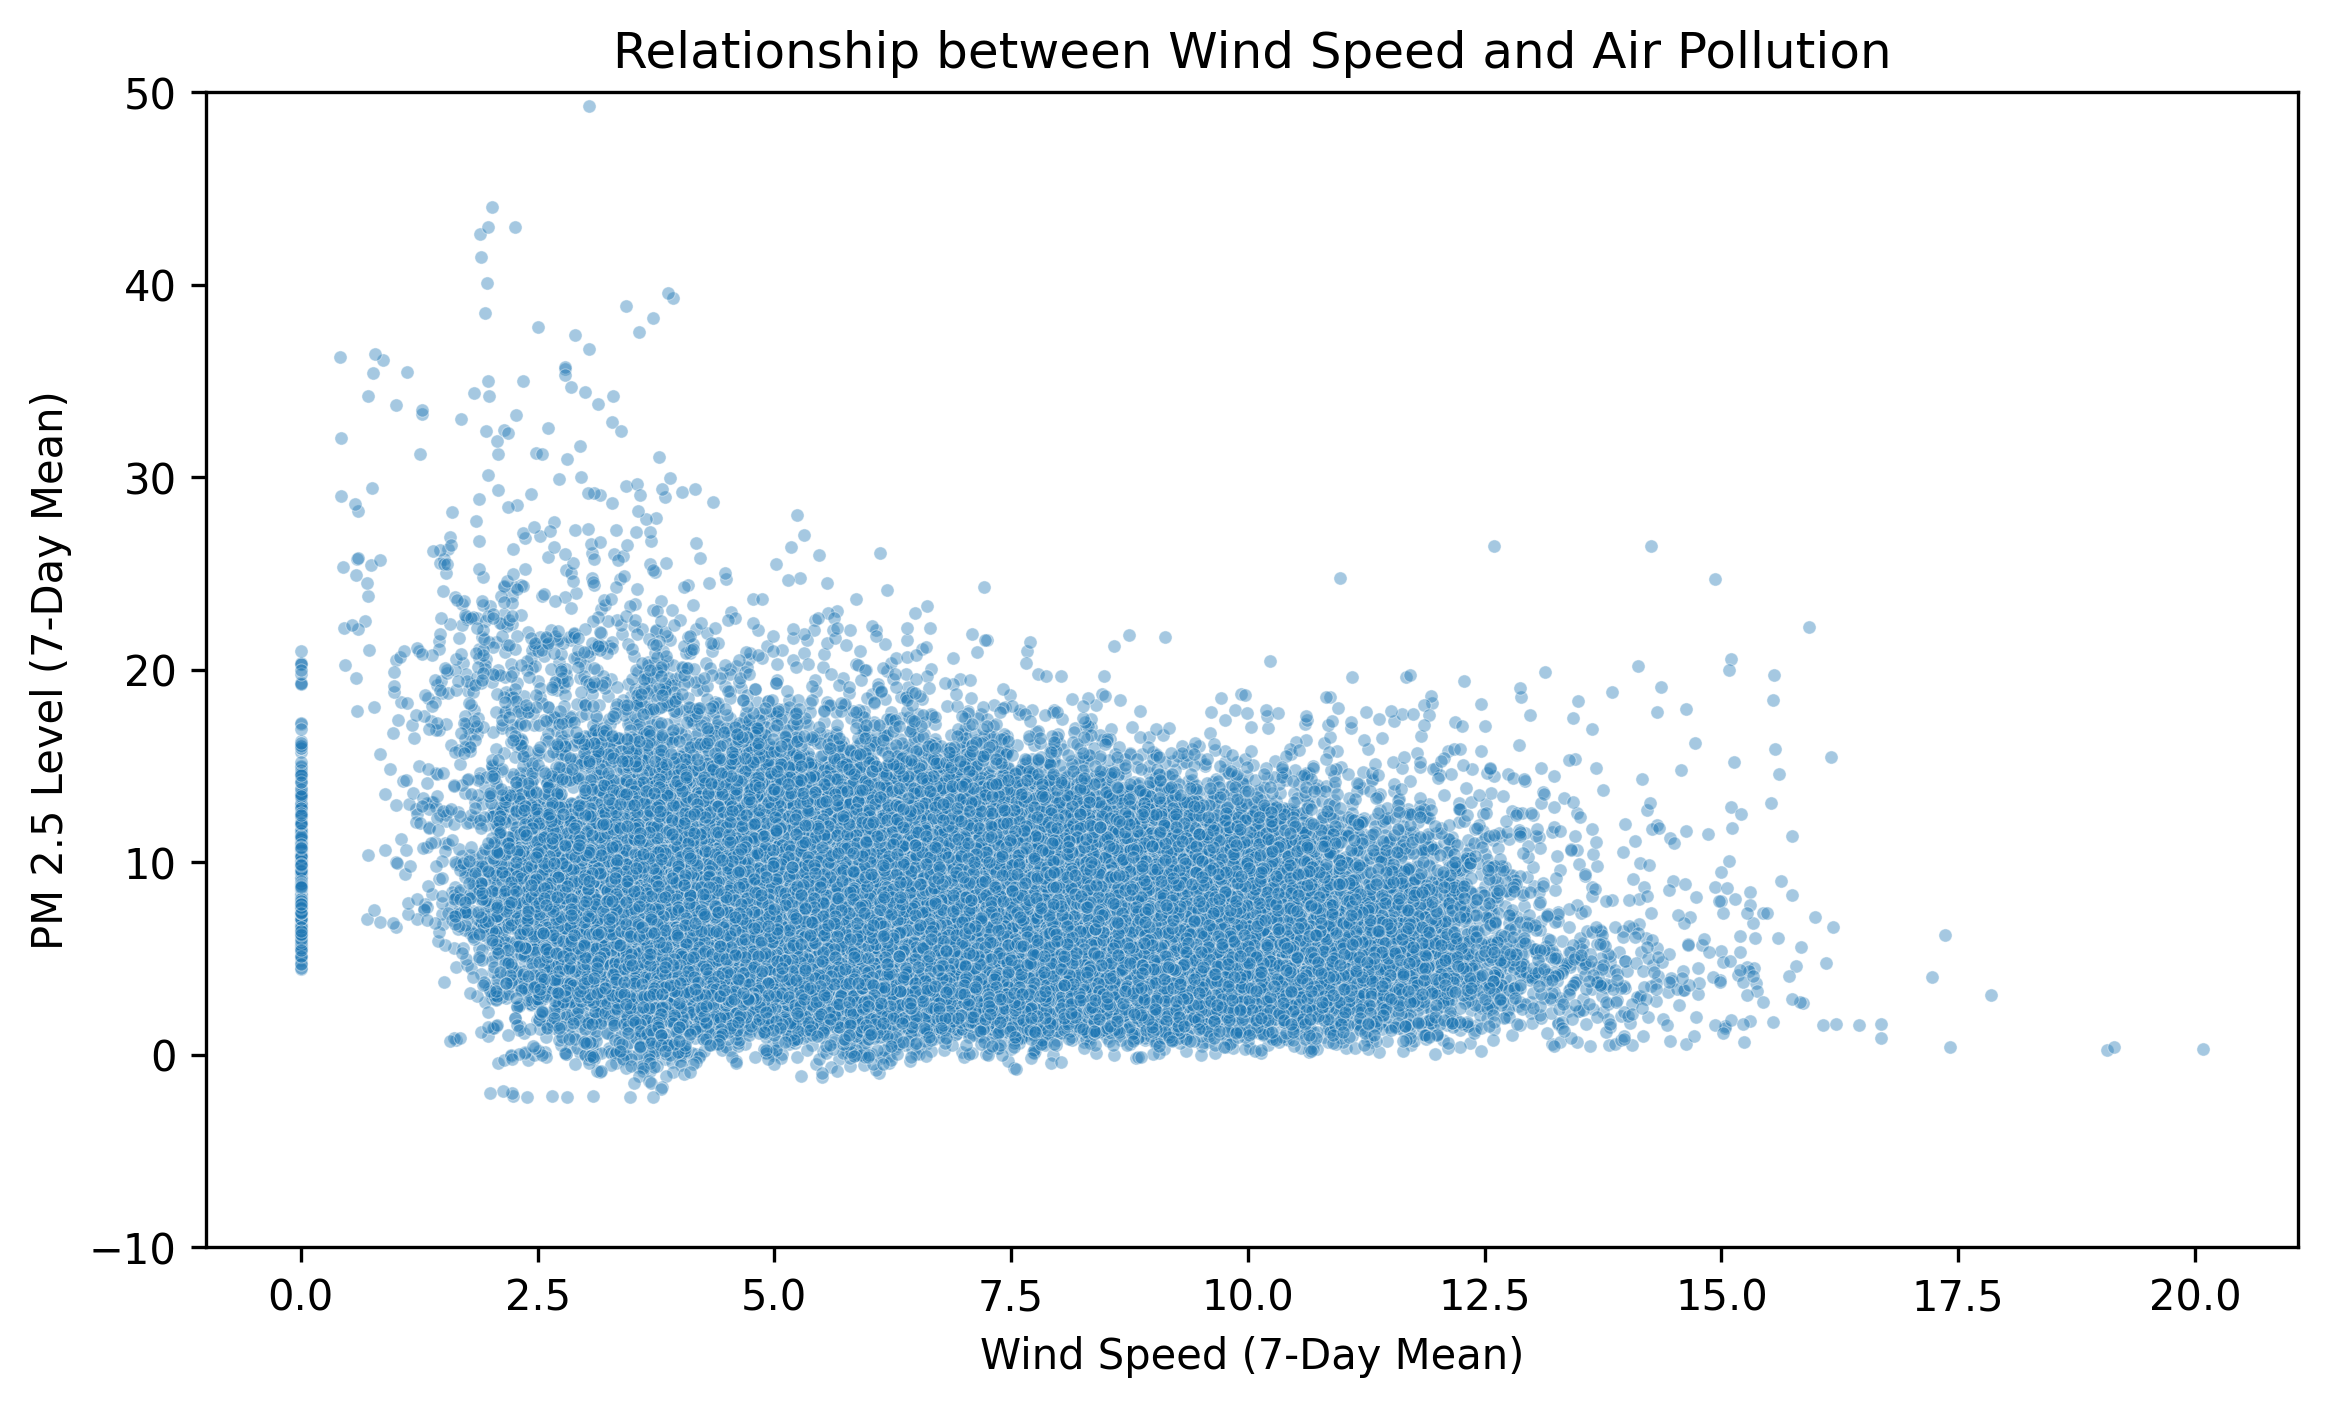

In [19]:
fig, ax = plt.subplots(figsize = (9,5))
sns.scatterplot(rel_noaa, x = "med_wdsp", y = "med_pm25", alpha = 0.4, s = 10)
plt.xlabel("Wind Speed (7-Day Mean)")
plt.ylabel("PM 2.5 Level (7-Day Mean)")
plt.title("Relationship between Wind Speed and Air Pollution")
plt.ylim(-10, 50)
plt.show()